## Import Libraries

In [104]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


## Fetch the Coordinates of New York

In [105]:
address = 'New York, New York'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate are 40.7127281, -74.0060152.


## Setting FourSquare Configurations

In [106]:
CLIENT_ID = '2G0MKVHCH3TME4LE2WXMB05RNA53M3HEO020NOR5YYSZD4VU' # your Foursquare ID
CLIENT_SECRET = 'MVVTOEEO4SRQ1XBNX30DYQKQAUJDPO3DRK0LBBKHSR5JLUUF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2G0MKVHCH3TME4LE2WXMB05RNA53M3HEO020NOR5YYSZD4VU
CLIENT_SECRET:MVVTOEEO4SRQ1XBNX30DYQKQAUJDPO3DRK0LBBKHSR5JLUUF


In [107]:
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2G0MKVHCH3TME4LE2WXMB05RNA53M3HEO020NOR5YYSZD4VU&client_secret=MVVTOEEO4SRQ1XBNX30DYQKQAUJDPO3DRK0LBBKHSR5JLUUF&v=20180605&ll=40.7127281,-74.0060152&radius=500&limit=300'

In [108]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cf7c1c3351e3d12830e9aa8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 177,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'labe

In [109]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [110]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
2,City Hall Park,3fd66200f964a520d8f11ee3,Park,40.712241,-74.006977
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734
8,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804
9,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994


In [111]:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
2,City Hall Park,3fd66200f964a520d8f11ee3,Park,40.712241,-74.006977
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734
8,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804
9,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994


In [112]:
nearby_venues['categories'].unique()

array(['Hotel Bar', 'Hotel', 'Park', 'Laundry Service', 'Coffee Shop',
       'Dance Studio', 'French Restaurant', 'Gym / Fitness Center',
       'Bakery', 'Indian Restaurant', 'Falafel Restaurant', 'Gym',
       'Sandwich Place', 'Yoga Studio', 'Monument / Landmark',
       'American Restaurant', 'Boxing Gym', 'Cuban Restaurant',
       'Sporting Goods Shop', 'Building', 'Liquor Store', 'Pizza Place',
       'Bar', 'Plaza', 'Event Space', 'Burger Joint',
       'Furniture / Home Store', 'Italian Restaurant', 'Spa',
       'Middle Eastern Restaurant', 'Antique Shop',
       'Fast Food Restaurant', 'Burrito Place', 'Juice Bar',
       'Cosmetics Shop', 'Art Gallery', "Women's Store", 'Strip Club',
       'Japanese Restaurant', 'Speakeasy', 'Baby Store', 'Bookstore',
       'Wine Bar', 'Restaurant', 'Coworking Space',
       'Health & Beauty Service', 'Café', 'Discount Store',
       'Greek Restaurant', 'Cocktail Bar', 'Nail Salon', 'Poke Place',
       'Kids Store', 'Molecular Gastronom

In [113]:
nearby_venues.shape

(100, 5)

In [114]:
removal_list = ['Gym / Fitness Center', 'Bakery', 'Park', "Women's Store", 'Sporting Goods Shop', 'Dog Run', 'Gaming Cafe',
               'Optical Shop', 'Yoga Studio', 'Pet Store', 'Shoe Repair', 'Jewelry Store', 'Record Shop', 'Juice Bar', 
               'Cosmetics Shop', 'Business Service', 'Salon / Barbershop', 'Liquor Store', 'Grocery Store', 'Stationery Store',
               'Pilates Studio', 'Dessert Shop', 'Bookstore', 'Concert Hall', 'Video Game Store', 'Pharmacy', 'Mobile Phone Shop',
               'Deli / Bodega']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2.shape

(82, 5)

In [115]:
venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['57f0689d498e7d49d9189369',
 '56d8c0f8498edb854f926e6a',
 '4c606c3e1e5cd13ad1a1a1ed',
 '56093809498e5344ab8835a6',
 '53373f26498e940581c90985',
 '58191674ded8f8626ed70af0',
 '575dea4c498e2739e43a27e2',
 '515c4ca3e4b00279706b095d',
 '52001eed498e9ac16ca5e20b',
 '528bf16711d2b7722da6b51c',
 '57c640ad498e74977f98372f',
 '56e7f585498ed6598b4030cd',
 '4a9442e3f964a520f92020e3',
 '57dc7ea2498e2a830309c81c',
 '534c9d7b498e1bdd443a40e1',
 '576c8b3c498eecbf1adee8e9',
 '4b8dbba4f964a5201e0b33e3',
 '4b311e89f964a520890025e3',
 '4be99814a9900f479a811540',
 '5c6f03f30802d4002c16884c',
 '49c79540f964a520af571fe3',
 '4db5fbfe43a1369cb5dc2a1f',
 '5021648ae4b0b9f6b6d566b2',
 '4f4d2593e4b00b42c3f1060f',
 '50ba9119e4b071a4bae6dc10',
 '4dc321be52b1e8f9f79a6f8f',
 '4a6e331af964a52031d41fe3',
 '4aa0669cf964a5207e3f20e3',
 '5787b68e498efcabbebba4f8',
 '4af5d65ff964a52091fd21e3',
 '5421eb06498e1b6b9c1bfd9c',
 '5447e0b2498e49ee7c7b1dc0',
 '57ad129c498e05b086594d72',
 '4b55feaff964a520f8fa27e3',
 '4b747291f964

In [116]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)
print(len(like_list))
print(len(venue_id_list))

[170, 185, 26, 139, 56, 214, 50, 83, 14, 274, 63, 163, 92, 113, 109, 50, 67, 112, 115, 23, 292, 164, 11, 50, 396, 28, 246, 171, 475, 98, 69, 93, 28, 24, 39, 57, 125, 7, 75, 170, 251, 23, 89, 32, 47, 18, 18, 280, 59, 14, 461, 7, 158, 47, 53, 55, 445, 25, 8, 70, 39, 38, 110, 66, 19, 7, 174, 63, 94, 552, 86, 306, 145, 298, 64, 180, 169, 351, 13, 20, 13, 84]
82
82


In [117]:
ny_venues = nearby_venues2.copy()
ny_venues.head()

,name,id,categories,lat,lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661


In [118]:
ny_venues['total likes'] = like_list
ny_venues.head()

,name,id,categories,lat,lng,total likes
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,170
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,185
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272,26
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,139
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661,56


552
7
72.5
119.35365853658537


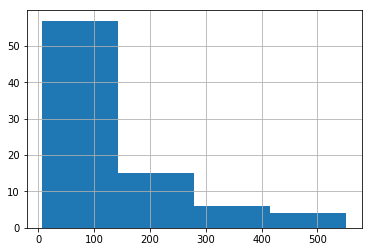

In [119]:
print(ny_venues['total likes'].max())
print(ny_venues['total likes'].min())
print(ny_venues['total likes'].median())
print(ny_venues['total likes'].mean())

ny_venues['total likes'].hist(bins=4)
plt.show()

In [120]:
print(np.percentile(ny_venues['total likes'], 25))
print(np.percentile(ny_venues['total likes'], 50))
print(np.percentile(ny_venues['total likes'], 75))

poor = ny_venues['total likes']<=24
below_avg = ny_venues[(ny_venues['total likes']>24) & (ny_venues['total likes']<=45)]
abv_avg = ny_venues[(ny_venues['total likes']>45) & (ny_venues['total likes']<=76)]
great = ny_venues['total likes']>76

33.5
72.5
167.75


In [121]:
def conditions(s):
    if s['total likes']<=20:
        return 'poor'
    if s['total likes']<=59:
        return 'below avg'
    if s['total likes']<=80:
        return 'avg avg'
    if s['total likes']>80:
        return 'great'

ny_venues['total likes_cat']=ny_venues.apply(conditions, axis=1)

In [122]:
ny_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,170,great
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,185,great
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272,26,below avg
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,139,great
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661,56,below avg
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,214,great
9,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,50,below avg
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853,83,great
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,14,poor
12,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526,274,great


In [123]:
ny_venues.shape

(82, 7)

In [124]:
bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop']
euro_asia_indian_food = ['Falafel Restaurant', 'Korean Restaurant','Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'


ny_venues['categories_new']=ny_venues.apply(conditions2, axis=1)

In [125]:
ny_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,170,great,None
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,185,great,None
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272,26,below avg,None
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,139,great,other
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661,56,below avg,None
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,214,great,None
9,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,50,below avg,euro asia indian food
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853,83,great,euro asia indian food
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,14,poor,None
12,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526,274,great,other


In [126]:
ny_onehot = pd.get_dummies(ny_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Name'] = ny_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Name,american food,bars,euro asia indian food,italian food,mex southam food,other,avg avg,below avg,great,poor
0,The Bar Room at Temple Court,0,0,0,0,0,0,0,0,1,0
1,The Beekman - A Thompson Hotel,0,0,0,0,0,0,0,0,1,0
3,Alba Dry Cleaner & Tailor,0,0,0,0,0,0,0,1,0,0
4,The Wooly Daily,0,0,0,0,0,1,0,0,1,0
5,Gibney Dance Center Downtown,0,0,0,0,0,0,0,1,0,0


## Clustering Method

In [127]:
cluster_df = ny_onehot.drop('Name', axis=1)

k_clusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 4, 2, 0, 2, 0, 1, 4])

In [128]:
ny_venues['label'] = kmeans.labels_
ny_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,170,great,None,0
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,185,great,None,0
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272,26,below avg,None,2
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,139,great,other,4
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661,56,below avg,None,2


## Map to visualise the 5 clusters

In [129]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_venues['lat'], ny_venues['lng'], ny_venues['name'], ny_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [130]:
ny_venues.loc[ny_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,170,great,None,0
1,The Beekman - A Thompson Hotel,56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,185,great,None,0
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,214,great,None,0
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853,83,great,euro asia indian food,0
16,African Burial Ground National Monument,4a9442e3f964a520f92020e3,Monument / Landmark,40.714990,-74.005530,92,great,None,0
17,Temple Court,57dc7ea2498e2a830309c81c,American Restaurant,40.711491,-74.006832,113,great,american food,0
18,Racines,534c9d7b498e1bdd443a40e1,French Restaurant,40.714754,-74.007581,109,great,None,0
21,Sophie's Cuban Cuisine,4b311e89f964a520890025e3,Cuban Restaurant,40.714803,-74.007656,112,great,mex southam food,0
23,Woolworth Building,4be99814a9900f479a811540,Building,40.712559,-74.007964,115,great,None,0
27,Maxwell's Bar & Restaurant,4db5fbfe43a1369cb5dc2a1f,Bar,40.714944,-74.006485,164,great,bars,0


### Cluster 2

In [131]:
ny_venues.loc[ny_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
11,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999,14,poor,None,1
28,Municipal Plaza,5021648ae4b0b9f6b6d566b2,Plaza,40.712755,-74.004498,11,poor,None,1
47,One Art Space,4ddef29818388714bb5ce52d,Art Gallery,40.714295,-74.008280,7,poor,None,1
56,Babesta,4cc368704fcfbfb70a0cbe24,Baby Store,40.714760,-74.009280,18,poor,None,1
58,Vin Sur Vingt,59cede02b23dfa246fee7545,Wine Bar,40.714721,-74.009832,18,poor,None,1
61,The Assemblage John Street,5ad8abdec365886896d7a611,Coworking Space,40.710104,-74.008574,14,poor,None,1
64,European Wax Center,5400b87a498e87c5ae6e5143,Health & Beauty Service,40.714710,-74.007448,7,poor,None,1
72,Pisillo Italian Cafe,588a4316326c5a4b60559f17,Café,40.710493,-74.007546,8,poor,None,1
80,Muscle Maker Grill,4be2eabf1dd22d7fb82295bd,Sandwich Place,40.713340,-74.008069,19,poor,other,1
81,Babesta,4b89c239f964a5206f4d32e3,Kids Store,40.714963,-74.009839,7,poor,None,1


### Cluster 3

In [132]:
ny_venues.loc[ny_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
3,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272,26,below avg,None,2
5,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661,56,below avg,None,2
9,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,50,below avg,euro asia indian food,2
19,Hank's Juicy Beef,576c8b3c498eecbf1adee8e9,Sandwich Place,40.714349,-74.007215,50,below avg,other,2
25,Joe’s Pizza,5c6f03f30802d4002c16884c,Pizza Place,40.710318,-74.007694,23,below avg,italian food,2
29,Potbelly Sandwich Shop,4f4d2593e4b00b42c3f1060f,Sandwich Place,40.714480,-74.005842,50,below avg,other,2
31,City Hall Park Fountain,4dc321be52b1e8f9f79a6f8f,Plaza,40.712152,-74.007156,28,below avg,None,2
39,Heyday,57ad129c498e05b086594d72,Spa,40.715598,-74.007882,28,below avg,None,2
40,Pita Express,4b55feaff964a520f8fa27e3,Middle Eastern Restaurant,40.711028,-74.007965,24,below avg,None,2
41,Philip Williams Posters,4b747291f964a52042dd2de3,Antique Shop,40.715284,-74.008781,39,below avg,None,2


### Cluster 4

In [133]:
ny_venues.loc[ny_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
13,Four Seasons Hotel New York Downtown,57c640ad498e74977f98372f,Hotel,40.712612,-74.009380,63,avg avg,None,3
20,Church Street Boxing Gym,4b8dbba4f964a5201e0b33e3,Boxing Gym,40.713354,-74.009067,67,avg avg,None,3
37,Gran Morsi,5421eb06498e1b6b9c1bfd9c,Italian Restaurant,40.714246,-74.007925,69,avg avg,italian food,3
49,FlashDancers Downtown,433b2e80f964a52036281fe3,Strip Club,40.714350,-74.009800,75,avg avg,None,3
73,Wall Street Bath & Spa 88,49ba7becf964a5206e531fe3,Spa,40.709278,-74.005690,70,avg avg,None,3
79,Poke Bowl,58c2e736bf1a6d6b31fa57fa,Poke Place,40.709722,-74.006854,66,avg avg,euro asia indian food,3
83,Kesté,58f54555e2ead178a41de832,Pizza Place,40.709183,-74.005191,63,avg avg,italian food,3
91,Smyth Hotel,49efcc88f964a52006691fe3,Hotel,40.715144,-74.009183,64,avg avg,None,3


### Cluster 5

In [134]:
ny_venues.loc[ny_venues['label']==4]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,139,great,other,4
12,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526,274,great,other,4
14,Birch Coffee,56e7f585498ed6598b4030cd,Coffee Shop,40.710759,-74.005953,163,great,other,4
26,Blue Spoon Coffee Co.,49c79540f964a520af571fe3,Coffee Shop,40.714428,-74.006859,292,great,other,4
50,Melt Shop,53a7307a498e56d9917d8f32,Sandwich Place,40.709800,-74.006677,170,great,other,4
53,Sandwich House,4a46c57ff964a5206fa91fe3,Sandwich Place,40.711003,-74.007922,89,great,other,4
59,Starbucks,4ad76597f964a5200e0a21e3,Coffee Shop,40.712204,-74.008052,280,great,other,4
84,Irving Farm Coffee Roasters,5697b7de498ea72f44225d37,Coffee Shop,40.710783,-74.009177,94,great,other,4
93,Voyager Espresso,566de7e3498e30e4798117ae,Coffee Shop,40.708787,-74.007063,169,great,other,4
